# Análise dos Parâmetros do Filtro
Neste notebook iremos aplicar os filtros passa-baixa e passa-alta em diversas imagens, usando variações para os parâmetros $n$ e $D_0$. Iremos imprimir o filtro para verificar como cada uma afeta seu formato e vamos testar cada um em uma imagem.

Relembrando a equação dos filtros passa-baixa e passa-alta, respectivamente:

$$ H_{baixa}(\mu, \nu) = \frac{1}{1 + {(\frac{\sqrt{\mu^2 + \nu^2}}{D_0})}^{2n}}$$ 


$$ H_{alta}(\mu, \nu) = \frac{1}{1 + {(\frac{D_0}{\sqrt{\mu^2 + \nu^2}})}^{2n}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

In [2]:
def generate_frequencies(num_rows, num_cols):
    '''Gera frequências do sinal tal que a frequência zero
       esteja no centro dos arrays'''

    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)  

    return freq_r, freq_c

def filtro_passa_baixa_butterworth(img, d0, n):
    '''Cria um filtro passa-baixa Butterworth de mesma dimensão que img. d0 e n são 
    utilizados para definir a máxima frequência que será mantida na imagem'''
    
    num_rows, num_cols = img.shape   
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    low_pass_butterworth = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            dist = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            H = 1/(1 + (dist/d0)**(2*n))
            
            low_pass_butterworth[row, col] = H
    
    return low_pass_butterworth

def filtro_passa_alta_butterworth(img, d0, n):
    '''Cria um filtro passa-alta Butterworth de mesma dimensão que img. d0 e n são 
    utilizados para definir a mínima frequência que será mantida na imagem'''
    
    num_rows, num_cols = img.shape   
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    high_pass_butterworth = np.zeros([num_rows, num_cols])
    
    for row in range(num_rows):
        for col in range(num_cols):
            dist = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            if dist == 0:
                dist = 1
            H = 1/(1+(d0/dist)**(2*n))
            
            high_pass_butterworth[row,col] = H
    
    return high_pass_butterworth

## Filtro Passa-baixa Butterworth

In [3]:
# Leitura da Imagem
img = plt.imread('test_image.tiff')
num_rows, num_cols = img.shape

# Criando imagem aumentada para evitar interferência 
# com as diversas cópias (virtuais) da imagem
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), 
                    mode='symmetric')

# Cálculo da Transformada de Fourier e das frequências da imagem
Fimg = fft2(img_padded)
freq_r, freq_c = generate_frequencies(2*num_rows, 2*num_cols)
Fimg = fftshift(Fimg)

In [4]:
# Calculando o filtro com diferentes valores para n e d0
lp_filter_1 = filtro_passa_baixa_butterworth(img_padded, d0=0.01, n=1)
lp_filter_2 = filtro_passa_baixa_butterworth(img_padded, d0=0.01, n=3)
lp_filter_3 = filtro_passa_baixa_butterworth(img_padded, d0=0.01, n=5)
lp_filter_4 = filtro_passa_baixa_butterworth(img_padded, d0=0.05, n=1)
lp_filter_5 = filtro_passa_baixa_butterworth(img_padded, d0=0.05, n=3)
lp_filter_6 = filtro_passa_baixa_butterworth(img_padded, d0=0.05, n=5)
lp_filter_7 = filtro_passa_baixa_butterworth(img_padded, d0=0.10, n=1)
lp_filter_8 = filtro_passa_baixa_butterworth(img_padded, d0=0.10, n=3)
lp_filter_9 = filtro_passa_baixa_butterworth(img_padded, d0=0.10, n=5)

Text(0.5, 1.0, 'Passa-baixa Butterworth (d0=0.10, n=5)')

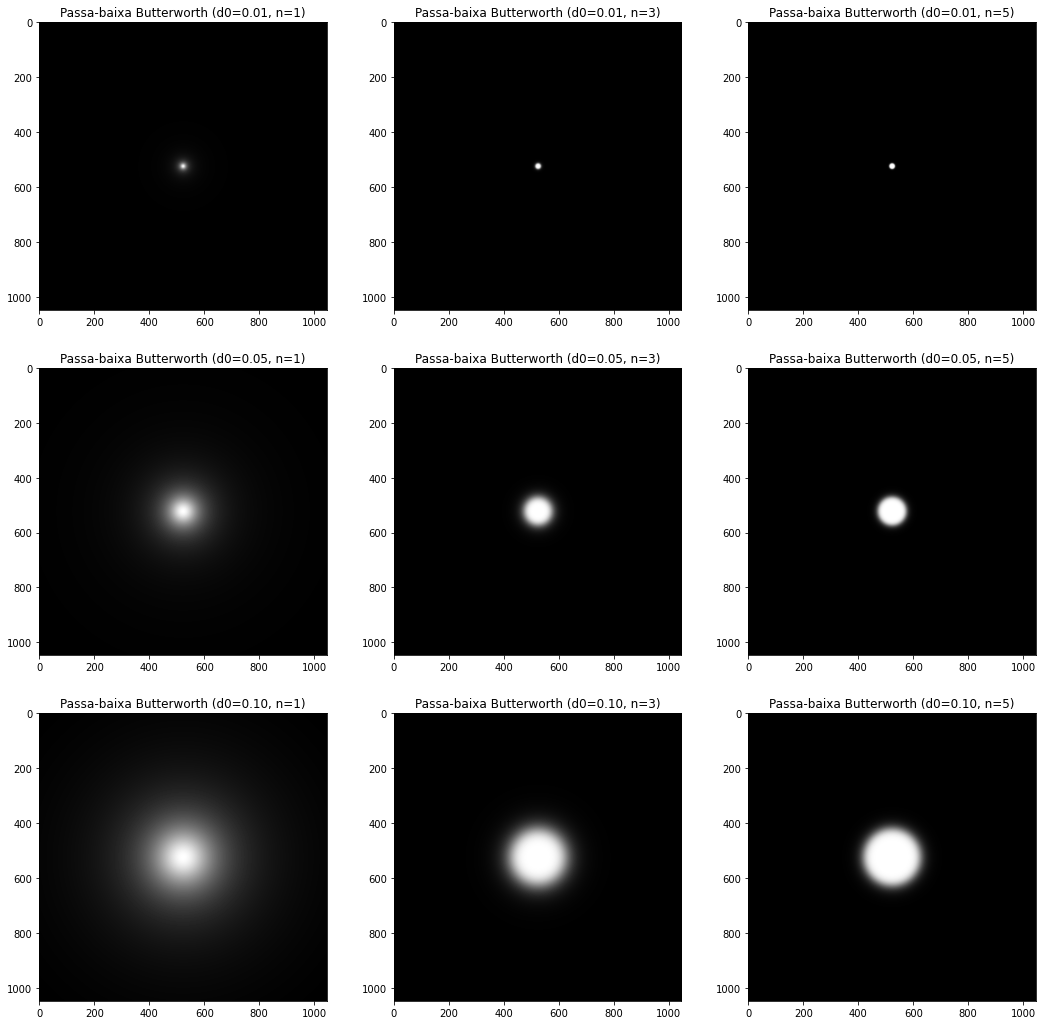

In [5]:
plt.figure(figsize=[18,18])
plt.subplot(3, 3, 1)
plt.imshow(lp_filter_1, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.01, n=1)")
plt.subplot(3, 3, 2)
plt.imshow(lp_filter_2, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.01, n=3)")
plt.subplot(3, 3, 3)
plt.imshow(lp_filter_3, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.01, n=5)")

plt.subplot(3, 3, 4)
plt.imshow(lp_filter_4, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.05, n=1)")
plt.subplot(3, 3, 5)
plt.imshow(lp_filter_5, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.05, n=3)")
plt.subplot(3, 3, 6)
plt.imshow(lp_filter_6, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.05, n=5)")

plt.subplot(3, 3, 7)
plt.imshow(lp_filter_7, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.10, n=1)")
plt.subplot(3, 3, 8)
plt.imshow(lp_filter_8, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.10, n=3)")
plt.subplot(3, 3, 9)
plt.imshow(lp_filter_9, 'gray')
plt.title("Passa-baixa Butterworth (d0=0.10, n=5)")

In [6]:
# Aplicando o filtro na frequencia
Fimg_filtered = []
Fimg_filtered.append(lp_filter_1*Fimg)
Fimg_filtered.append(lp_filter_2*Fimg)
Fimg_filtered.append(lp_filter_3*Fimg)
Fimg_filtered.append(lp_filter_4*Fimg)
Fimg_filtered.append(lp_filter_5*Fimg)
Fimg_filtered.append(lp_filter_6*Fimg)
Fimg_filtered.append(lp_filter_7*Fimg)
Fimg_filtered.append(lp_filter_8*Fimg)
Fimg_filtered.append(lp_filter_9*Fimg)

img_filtered = []
for i in range(len(Fimg_filtered)):
    Fimg_filtered[i] = fftshift(Fimg_filtered[i])
    img_filtered.append(np.real(ifft2(Fimg_filtered[i])))
    img_filtered[i] = img_filtered[i][:num_rows, :num_cols]

Text(0.5, 1.0, 'Imagem Filtrada (d0=0.10, n=5)')

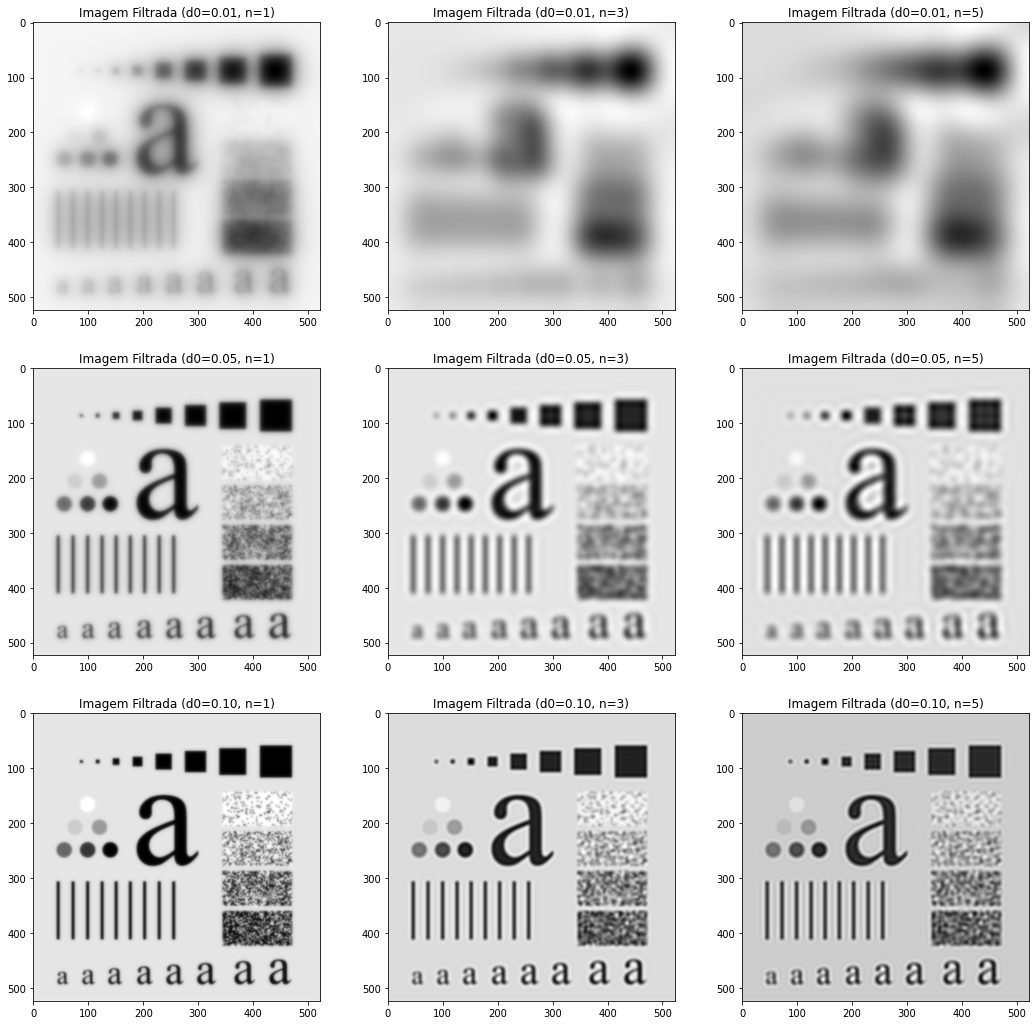

In [7]:
plt.figure(figsize=[18,18])
plt.subplot(3, 3, 1)
plt.imshow(img_filtered[0], 'gray')
plt.title("Imagem Filtrada (d0=0.01, n=1)")
plt.subplot(3, 3, 2)
plt.imshow(img_filtered[1], 'gray')
plt.title("Imagem Filtrada (d0=0.01, n=3)")
plt.subplot(3, 3, 3)
plt.imshow(img_filtered[2], 'gray')
plt.title("Imagem Filtrada (d0=0.01, n=5)")

plt.subplot(3, 3, 4)
plt.imshow(img_filtered[3], 'gray')
plt.title("Imagem Filtrada (d0=0.05, n=1)")
plt.subplot(3, 3, 5)
plt.imshow(img_filtered[4], 'gray')
plt.title("Imagem Filtrada (d0=0.05, n=3)")
plt.subplot(3, 3, 6)
plt.imshow(img_filtered[5], 'gray')
plt.title("Imagem Filtrada (d0=0.05, n=5)")

plt.subplot(3, 3, 7)
plt.imshow(img_filtered[6], 'gray')
plt.title("Imagem Filtrada (d0=0.10, n=1)")
plt.subplot(3, 3, 8)
plt.imshow(img_filtered[7], 'gray')
plt.title("Imagem Filtrada (d0=0.10, n=3)")
plt.subplot(3, 3, 9)
plt.imshow(img_filtered[8], 'gray')
plt.title("Imagem Filtrada (d0=0.10, n=5)")

## Filtro passa-alta Butterworth


In [8]:
# Leitura da Imagem
img = plt.imread('test_image.tiff')
num_rows, num_cols = img.shape

# Criando imagem aumentada para evitar interferência 
# com as diversas cópias (virtuais) da imagem
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), 
                    mode='symmetric')

# Cálculo da Transformada de Fourier e das frequências da imagem
Fimg = fft2(img_padded)
freq_r, freq_c = generate_frequencies(2*num_rows, 2*num_cols)
Fimg = fftshift(Fimg)

In [9]:
# Calculando o filtro com diferentes valores para n e d0
hp_filter_1 = filtro_passa_alta_butterworth(img_padded, d0=0.01, n=1)
hp_filter_2 = filtro_passa_alta_butterworth(img_padded, d0=0.01, n=3)
hp_filter_3 = filtro_passa_alta_butterworth(img_padded, d0=0.01, n=5)
hp_filter_4 = filtro_passa_alta_butterworth(img_padded, d0=0.05, n=1)
hp_filter_5 = filtro_passa_alta_butterworth(img_padded, d0=0.05, n=3)
hp_filter_6 = filtro_passa_alta_butterworth(img_padded, d0=0.05, n=5)
hp_filter_7 = filtro_passa_alta_butterworth(img_padded, d0=0.10, n=1)
hp_filter_8 = filtro_passa_alta_butterworth(img_padded, d0=0.10, n=3)
hp_filter_9 = filtro_passa_alta_butterworth(img_padded, d0=0.10, n=5)

Text(0.5, 1.0, 'Passa-alta Butterworth (d0=0.10, n=5)')

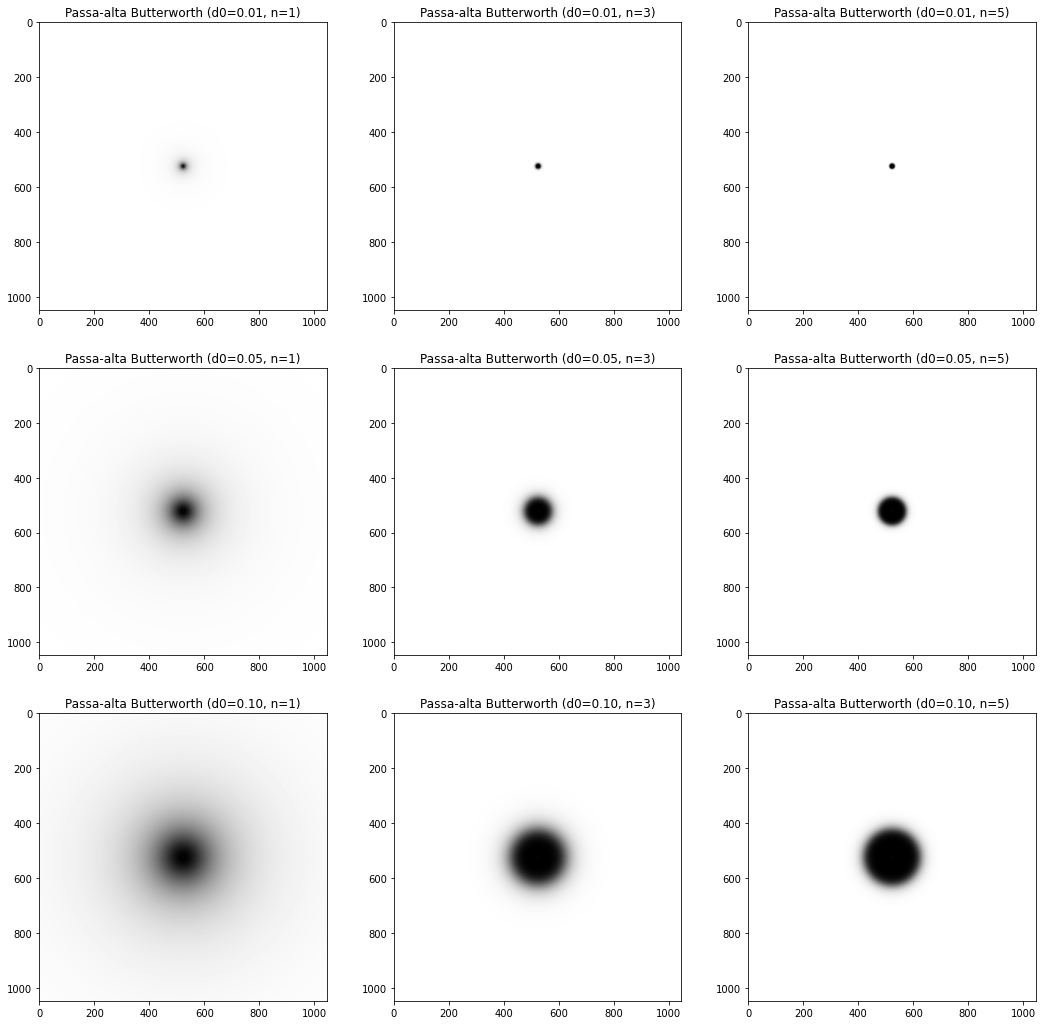

In [10]:
plt.figure(figsize=[18,18])
plt.subplot(3, 3, 1)
plt.imshow(hp_filter_1, 'gray')
plt.title("Passa-alta Butterworth (d0=0.01, n=1)")
plt.subplot(3, 3, 2)
plt.imshow(hp_filter_2, 'gray')
plt.title("Passa-alta Butterworth (d0=0.01, n=3)")
plt.subplot(3, 3, 3)
plt.imshow(hp_filter_3, 'gray')
plt.title("Passa-alta Butterworth (d0=0.01, n=5)")

plt.subplot(3, 3, 4)
plt.imshow(hp_filter_4, 'gray')
plt.title("Passa-alta Butterworth (d0=0.05, n=1)")
plt.subplot(3, 3, 5)
plt.imshow(hp_filter_5, 'gray')
plt.title("Passa-alta Butterworth (d0=0.05, n=3)")
plt.subplot(3, 3, 6)
plt.imshow(hp_filter_6, 'gray')
plt.title("Passa-alta Butterworth (d0=0.05, n=5)")

plt.subplot(3, 3, 7)
plt.imshow(hp_filter_7, 'gray')
plt.title("Passa-alta Butterworth (d0=0.10, n=1)")
plt.subplot(3, 3, 8)
plt.imshow(hp_filter_8, 'gray')
plt.title("Passa-alta Butterworth (d0=0.10, n=3)")
plt.subplot(3, 3, 9)
plt.imshow(hp_filter_9, 'gray')
plt.title("Passa-alta Butterworth (d0=0.10, n=5)")

In [11]:
# Aplicando o filtro na frequencia
Fimg_filtered = []
Fimg_filtered.append(hp_filter_1*Fimg)
Fimg_filtered.append(hp_filter_2*Fimg)
Fimg_filtered.append(hp_filter_3*Fimg)
Fimg_filtered.append(hp_filter_4*Fimg)
Fimg_filtered.append(hp_filter_5*Fimg)
Fimg_filtered.append(hp_filter_6*Fimg)
Fimg_filtered.append(hp_filter_7*Fimg)
Fimg_filtered.append(hp_filter_8*Fimg)
Fimg_filtered.append(hp_filter_9*Fimg)

img_filtered = []
for i in range(len(Fimg_filtered)):
    Fimg_filtered[i] = fftshift(Fimg_filtered[i])
    img_filtered.append(np.real(ifft2(Fimg_filtered[i])))
    img_filtered[i] = img_filtered[i][:num_rows, :num_cols]

Text(0.5, 1.0, 'Imagem Filtrada (d0=0.10, n=5)')

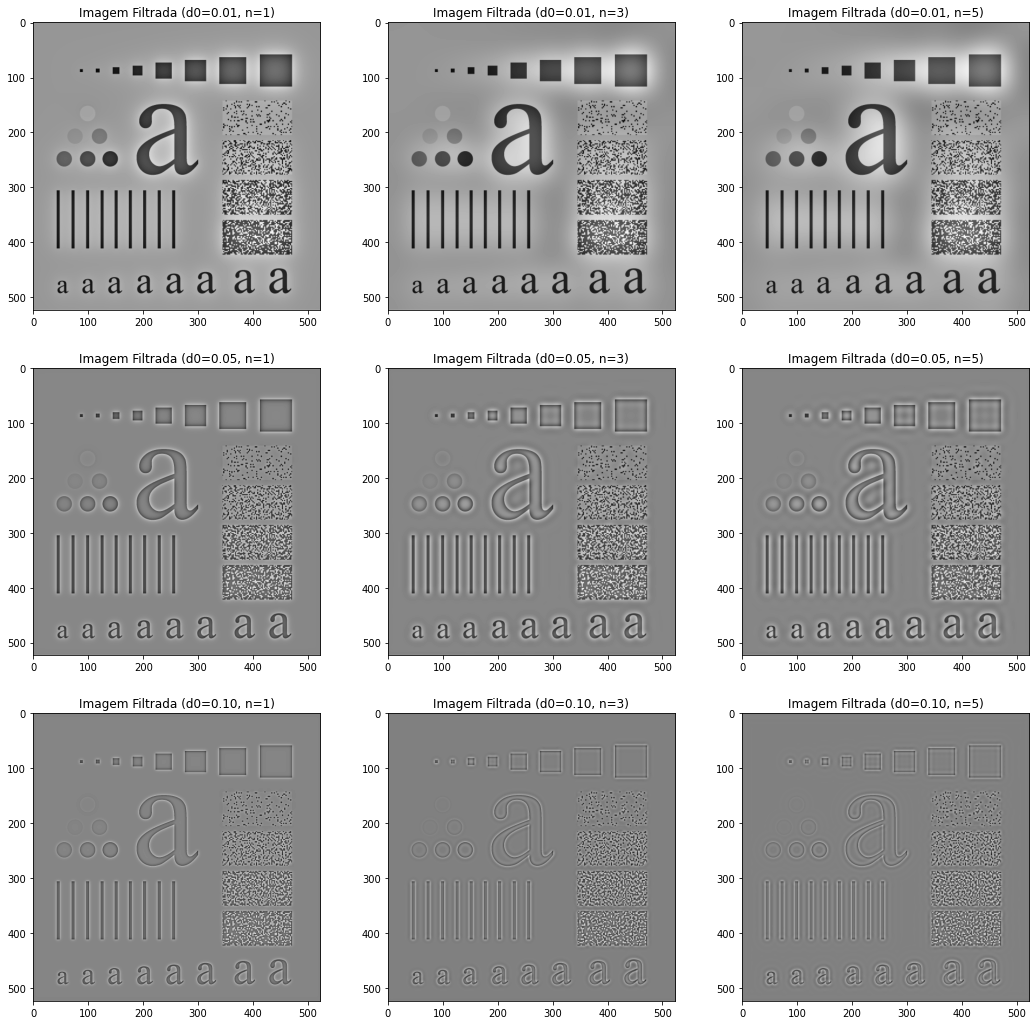

In [12]:
plt.figure(figsize=[18,18])
plt.subplot(3, 3, 1)
plt.imshow(img_filtered[0], 'gray')
plt.title("Imagem Filtrada (d0=0.01, n=1)")
plt.subplot(3, 3, 2)
plt.imshow(img_filtered[1], 'gray')
plt.title("Imagem Filtrada (d0=0.01, n=3)")
plt.subplot(3, 3, 3)
plt.imshow(img_filtered[2], 'gray')
plt.title("Imagem Filtrada (d0=0.01, n=5)")

plt.subplot(3, 3, 4)
plt.imshow(img_filtered[3], 'gray')
plt.title("Imagem Filtrada (d0=0.05, n=1)")
plt.subplot(3, 3, 5)
plt.imshow(img_filtered[4], 'gray')
plt.title("Imagem Filtrada (d0=0.05, n=3)")
plt.subplot(3, 3, 6)
plt.imshow(img_filtered[5], 'gray')
plt.title("Imagem Filtrada (d0=0.05, n=5)")

plt.subplot(3, 3, 7)
plt.imshow(img_filtered[6], 'gray')
plt.title("Imagem Filtrada (d0=0.10, n=1)")
plt.subplot(3, 3, 8)
plt.imshow(img_filtered[7], 'gray')
plt.title("Imagem Filtrada (d0=0.10, n=3)")
plt.subplot(3, 3, 9)
plt.imshow(img_filtered[8], 'gray')
plt.title("Imagem Filtrada (d0=0.10, n=5)")